In [3]:
import networkx as nx
import networkx.algorithms.community as nx_comm

from utilities import import_networks

# from networkx.algorithms.community.centrality import girvan_newman
# from networkx.algorithms.community import lukes_partitioning

import matplotlib.pyplot as plt
import numpy as np
#Modularity communities
#Import data
import json
with open("data/modularity_communities_statistics.json", "r") as f:
    communities_statistics = json.load(f)
with open("data/modularity_communities.json", "r") as f:
    communities_by_resolution = json.load(f)
    
with open("data/louvain_modularity_communities_statistics.json", "r") as f:
    louvain_communities_statistics = json.load(f)
with open("data/louvain_modularity_communities.json", "r") as f:
    louvain_communities_by_resolution = json.load(f)
   
    

resolutions = np.append(np.arange(0,1,0.2),np.arange(1,25,0.5))

year="2021"

#Visualize statistics
colors = ['#EE7732', '#33BBEE',  '#EE3377',  '#0077BB']
#colors = dict(zip(range(2018,2022),colors))
algorithms=dict(zip("greedy", "louvain"))
type=dict(zip(algorithms,colors))
#communities_statistics[year].items()
#colors[0]

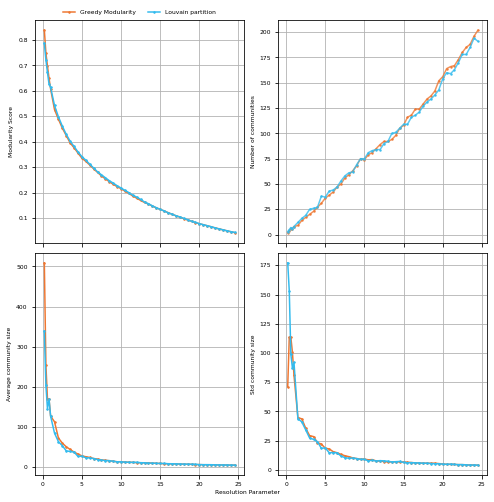

In [67]:
plt.rcParams.update({'font.size': 6})
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    
plt.rc('axes', titlesize=6)    


cm = 1/2.54
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(2*8.7*cm,2*8.7*cm),sharex=True)
fig.text(0.5, 0.00, 'Resolution Parameter', ha='center')

ax[0,0].set(ylabel="Modularity Score")
# ax[0,1].set(xlabel="Resolution parameter", ylabel="Median community size")
ax[0,1].set( ylabel="Number of communities",yscale="linear")
ax[1,0].set( ylabel="Average community size",yscale="linear")
ax[1,1].set( ylabel="Std community size",yscale="linear")
label_1  = 'Greedy Modularity'
label_2  = 'Louvain partition'
#for data in communities_statistics[year].items():
ax[0,0].plot(resolutions[1:],communities_statistics[year]["Modularity_score"][1:],label=label_1, marker='o', ms=1.5, color = colors[0])
ax[0,1].plot(resolutions[1:],communities_statistics[year]["N_communities"][1:],label=label_1, marker='o', ms=1.5,alpha=0.8, color = colors[0])
# ax[0,1].plot(resolutions,data["Median_comm_size"],label=year, marker='o', ms=3, color = colors[int(year)])
ax[1,0].plot(resolutions[1:],communities_statistics[year]["Avg_comm_size"][1:],label=label_1, marker='o', ms=1.5, color = colors[0])
ax[1,1].plot(resolutions[1:],communities_statistics[year]["Sigma_comm_size"][1:],label=label_1, marker='o', ms=1.5, color = colors[0])

ax[0,0].plot(resolutions[1:],louvain_communities_statistics[year]["Modularity_score"][1:],label=label_2, marker='o', ms=1.5, color = colors[1])
ax[0,1].plot(resolutions[1:],louvain_communities_statistics[year]["N_communities"][1:],label=label_2, marker='o', ms=1.5,alpha=0.8, color = colors[1])
# ax[0,1].plot(resolutions,data["Median_comm_size"],label=year, marker='o', ms=3, color = colors[int(year)])
ax[1,0].plot(resolutions[1:],louvain_communities_statistics[year]["Avg_comm_size"][1:],label=label_2, marker='o', ms=1.5, color = colors[1])
ax[1,1].plot(resolutions[1:],louvain_communities_statistics[year]["Sigma_comm_size"][1:],label=label_2, marker='o', ms=1.5, color = colors[1])
             

for a in ax.flatten():
    a.grid()
    # a.set_xticks(a.get_xticks())
    # a.set_xticklabels(a.get_xticklabels(),fontdict={"fontsize":6})
    # a.legend()
# ax[0,0].grid()
# ax[0,1].grid()
# ax[0,0].legend()
# ax[0,1].legend()
ax[0,0].legend(ncol=2,bbox_to_anchor=(0.5,1),loc="lower center",frameon=False)
plt.tight_layout()
plt.savefig("mod_vs_louvain_community_statistics.pdf",dpi=200)
# plt.savefig("modularity_community_statistics.png",dpi=200)

No handles with labels found to put in legend.


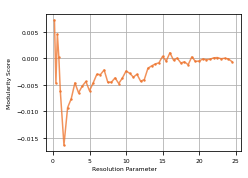

In [32]:
plt.rcParams.update({'font.size': 6})
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    
plt.rc('axes', titlesize=6)    


cm = 1/2.54
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8.7*cm,6*cm),sharex=True)
fig.text(0.5, 0.00, 'Resolution Parameter', ha='center')


# ax[0,1].set(xlabel="Resolution parameter", ylabel="Median community size")
ax.set( ylabel="Modularity Score",yscale="linear")


label_1  = 'Greedy Modularity'
label_2  = 'Louvain partition'
#for data in communities_statistics[year].items():
tmp=[]
for i in range(1,len(resolutions)):
    
    tmp.append( communities_statistics[year]["Modularity_score"][i]-louvain_communities_statistics[year]["Modularity_score"][i])
ax.plot(resolutions[1:],tmp, marker='o', ms=1.5,alpha=0.8, color = colors[0])
#ax.plot(resolutions[1:],louvain_communities_statistics[year]["Modularity_score"][1:],label=label_2, marker='o', ms=1.5,alpha=0.8, color = colors[1])

       

#for a in ax.flatten():
ax.grid()
    # a.set_xticks(a.get_xticks())
    # a.set_xticklabels(a.get_xticklabels(),fontdict={"fontsize":6})
    # a.legend()
# ax[0,0].grid()
# ax[0,1].grid()
# ax[0,0].legend()
# ax[0,1].legend()
plt.legend(ncol=2,bbox_to_anchor=(0.5,1),loc="lower center",frameon=False)
plt.tight_layout()
plt.savefig("mod_vs_louvain_mod_score_difference.pdf",dpi=200)
# plt.savefig("modularity_community_statistics.png",dpi=200)

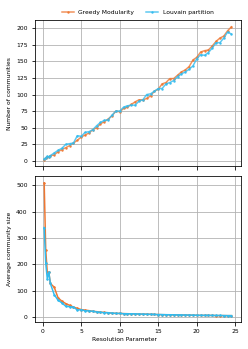

In [23]:
plt.rcParams.update({'font.size': 6})
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    
plt.rc('axes', titlesize=6)    


cm = 1/2.54
fig,ax = plt.subplots(ncols=1,nrows=2,figsize=(8.7*cm,2*6*cm),sharex=True)
fig.text(0.5, 0.00, 'Resolution Parameter', ha='center')


# ax[0,1].set(xlabel="Resolution parameter", ylabel="Median community size")
ax[0].set( ylabel="Number of communities",yscale="linear")
ax[1].set( ylabel="Average community size",yscale="linear")

label_1  = 'Greedy Modularity'
label_2  = 'Louvain partition'
#for data in communities_statistics[year].items():
ax[0].plot(resolutions[1:],communities_statistics[year]["N_communities"][1:],label=label_1, marker='o', ms=1.5,alpha=0.8, color = colors[0])
# ax[0,1].plot(resolutions,data["Median_comm_size"],label=year, marker='o', ms=3, color = colors[int(year)])
ax[1].plot(resolutions[1:],communities_statistics[year]["Avg_comm_size"][1:],label=label_1, marker='o', ms=1.5, color = colors[0])



ax[0].plot(resolutions[1:],louvain_communities_statistics[year]["N_communities"][1:],label=label_2, marker='o', ms=1.5,alpha=0.8, color = colors[1])
# ax[0,1].plot(resolutions,data["Median_comm_size"],label=year, marker='o', ms=3, color = colors[int(year)])
ax[1].plot(resolutions[1:],louvain_communities_statistics[year]["Avg_comm_size"][1:],label=label_2, marker='o', ms=1.5, color = colors[1])

             

for a in ax.flatten():
    a.grid()
    # a.set_xticks(a.get_xticks())
    # a.set_xticklabels(a.get_xticklabels(),fontdict={"fontsize":6})
    # a.legend()
# ax[0,0].grid()
# ax[0,1].grid()
# ax[0,0].legend()
# ax[0,1].legend()
ax[0].legend(ncol=2,bbox_to_anchor=(0.5,1),loc="lower center",frameon=False)
plt.tight_layout()
plt.savefig("mod_vs_louvain_community_statistics_v2.pdf",dpi=200)
# plt.savefig("modularity_community_statistics.png",dpi=200)

In [22]:
def comparing_clustering_resolution(G, array):
    clustering=[]
    resolution=[]

    for i in range(len(array)):
        clust=0
        #print("found %d communities" % len(array[i]))

        for j in range(len(array[i])):
            clust += nx.average_clustering(G, list(array[i][j]))
        
        clust=clust/len(array[i])
        clustering.append(clust)
        resolution.append(i)
    
    data =zip(resolution, clustering)
    #headers=['resolution index', 'clust coef']
    #print(tabulate(data, headers= headers, tablefmt="plain"))
    return clustering

In [25]:
len(communities_by_resolution["2021"][1])


2

In [10]:
len(resolutions)

53

In [6]:
networks = import_networks()
networks[3].graph

{'node_default': {}, 'edge_default': {}, 'year': 2021}

In [23]:
clustering=comparing_clustering_resolution(networks[3], communities_by_resolution["2021"])

In [57]:
louvain_clustering=comparing_clustering_resolution(networks[3], louvain_communities_by_resolution["2021"])

found 1 communities
found 3 communities
found 5 communities
found 7 communities
found 6 communities
found 8 communities
found 12 communities
found 16 communities
found 19 communities
found 25 communities
found 26 communities
found 27 communities
found 38 communities
found 37 communities
found 43 communities
found 44 communities
found 47 communities
found 53 communities
found 58 communities
found 61 communities
found 62 communities
found 69 communities
found 75 communities
found 75 communities
found 81 communities
found 83 communities
found 84 communities
found 84 communities
found 90 communities
found 92 communities
found 100 communities
found 101 communities
found 105 communities
found 109 communities
found 109 communities
found 116 communities
found 118 communities
found 121 communities
found 127 communities
found 131 communities
found 134 communities
found 138 communities
found 143 communities
found 154 communities
found 160 communities
found 159 communities
found 163 communities
fo

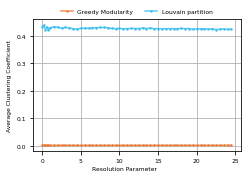

In [62]:
plt.rcParams.update({'font.size': 6})
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    
plt.rc('axes', titlesize=6)    


cm = 1/2.54
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8.7*cm,6*cm),sharex=True)
fig.text(0.5, 0.00, 'Resolution Parameter', ha='center')


# ax[0,1].set(xlabel="Resolution parameter", ylabel="Median community size")
#ax.set( xlabel="Resolution parameter",yscale="linear")
ax.set( ylabel="Average Clustering Coefficient",yscale="linear")

label_1  = 'Greedy Modularity'
label_2  = 'Louvain partition'
#for data in communities_statistics[year].items():
ax.plot(resolutions,clustering,label=label_1, marker='o', ms=1.5,alpha=0.8, color = colors[0])
ax.plot(resolutions,louvain_clustering,label=label_2, marker='o', ms=1.5,alpha=0.8, color = colors[1])


#for a in ax.flatten():
ax.grid()
    # a.set_xticks(a.get_xticks())
    # a.set_xticklabels(a.get_xticklabels(),fontdict={"fontsize":6})
    # a.legend()
# ax[0,0].grid()
# ax[0,1].grid()
# ax[0,0].legend()
# ax[0,1].legend()
ax.legend(ncol=2,bbox_to_anchor=(0.5,1),loc="lower center",frameon=False)
plt.tight_layout()
plt.savefig("mod_vs_louvain_clustering.pdf",dpi=200)
# plt.savefig("modularity_community_statistics.png",dpi=200)

In [46]:
np.where(max(clustering)==clustering)

(array([], dtype=int64),)

In [63]:
clustering


[0.0012929924142393615,
 0.001312159679299746,
 0.0013522113085134907,
 0.0012678909571822831,
 0.00125491677401711,
 0.0012613483746250784,
 0.0012792104764116847,
 0.0013604806385353687,
 0.0013849818961057146,
 0.001399545627762594,
 0.0013671167167712303,
 0.0013389059461895764,
 0.00132059776586726,
 0.0012971895896144996,
 0.0013347506010958968,
 0.0013093743594995437,
 0.0013241878523203542,
 0.0013401816141099096,
 0.001312891757274828,
 0.001326487860690959,
 0.0013290934191111342,
 0.0013358804714549979,
 0.001310265831609794,
 0.0013277445672911952,
 0.0013256071686191732,
 0.0013380604779028769,
 0.0013414447113339616,
 0.0013330348470971469,
 0.001337336660732932,
 0.0013436294818730873,
 0.0013514094286097324,
 0.001346174519463343,
 0.001351443692965748,
 0.0013989998317360582,
 0.0013970572593558028,
 0.001391639400325106,
 0.0013942459867534475,
 0.001412226676097746,
 0.0014078767786437692,
 0.0014282343877100138,
 0.0014211911515546805,
 0.0014264324488961146,
 0.001

In [68]:
networks[3].graph.keys()

dict_keys(['node_default', 'edge_default', 'year'])

In [7]:
a=[]
for i in range(len(communities_by_resolution["2021"][6])):
    a.append(nx.algorithms.assortativity.attribute_assortativity_coefficient(networks[3],'grade', communities_by_resolution["2021"][6][i]))

In [8]:
print(a)


[-0.002332997887822601, -0.0023653739617272335, -0.0032552029863044197, -0.003999015235453285, -0.002606326825999907, -0.005343973004535547, -0.0030107329198767797, -0.004729905699302008, -0.005113282933114845]


In [11]:
b=[]
for i in range(len(communities_by_resolution["2021"][4])):
    b.append(nx.algorithms.assortativity.attribute_assortativity_coefficient(networks[3],'grade', communities_by_resolution["2021"][6][i]))

In [12]:
print(b)

[-0.002332997887822601, -0.0023653739617272335, -0.0032552029863044197, -0.003999015235453285, -0.002606326825999907, -0.005343973004535547]


In [19]:
def comparing_assortativity(G, array):
    assortativity=[]
    
    for i in range(len(array)):
        aux=0
        print("found %d communities" % len(array[i]))
        aux_2=[]
        for j in range(len(array[i])):
            aux = nx.algorithms.assortativity.attribute_assortativity_coefficient(G,'grade', array[i][j])
            print("grade assortativity for community %d = %.4f" %(j, aux))
            aux_2.append(aux)
        
        
        assortativity.append(aux_2)
        
        #resolution.append(i)
    
    #data =zip(resolution, clustering)
    #headers=['resolution index', 'clust coef']
    #print(tabulate(data, headers= headers, tablefmt="plain"))
    return assortativity

In [20]:
a=comparing_assortativity(networks[3], communities_by_resolution["2021"])

found 1 communities
grade assortativity for community 0 = -0.0007
found 2 communities
grade assortativity for community 0 = -0.0013
grade assortativity for community 1 = -0.0016
found 4 communities
grade assortativity for community 0 = -0.0016
grade assortativity for community 1 = -0.0022
grade assortativity for community 2 = -0.0023
grade assortativity for community 3 = -0.0067
found 6 communities
grade assortativity for community 0 = -0.0016
grade assortativity for community 1 = -0.0023
grade assortativity for community 2 = -0.0034
grade assortativity for community 3 = -0.0029
grade assortativity for community 4 = -0.0066
grade assortativity for community 5 = -0.0056
found 6 communities
grade assortativity for community 0 = -0.0018
grade assortativity for community 1 = -0.0024
grade assortativity for community 2 = -0.0033
grade assortativity for community 3 = -0.0025
grade assortativity for community 4 = -0.0057
grade assortativity for community 5 = -0.0056
found 8 communities
grade 

In [25]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(communities_by_resolution["2021"][1][0], communities_by_resolution["2020"][1][0])



ValueError: Found input variables with inconsistent numbers of samples: [580, 579]